# Análise Exploratória e Preditiva: 
# Preço de Casas - Técnicas de Regressão Avançadas | Kaggle

***

#### Análise realizada por ***Vinícius Nunes Rebeque*** em Agosto/2022 
#### Visite meu LinkedIn: https://www.linkedin.com/in/vrebeque/ 
#### Explore meu GitHub: https://github.com/Rebeque 
***

Fonte dos dados: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

[Clique aqui](#start) para descer diretamente para o início dos códigos.

Ou use <a href="link do pdf" title="LinkedIn">esse botão </a>para ver a versão simplificada em PDF resolução mobile desse trabalho.



#### 1. INTRODUÇÃO:

Esse dataset foi **desenvolvido por Dean De Cock** com o objetivo de **educar aprendizes** em **Análise de Dados** e **Aprendizado de Máquina**. Ele é um conjunto de **dados públicos** hospedado na Kaggle.com (plataforma de aprendizado de dados).

Os dados observados são registros de vendas de casas de 4 anos. Entre 2006 e 2010.

Você tem alguma informação sobre como são determinados os valores de casas à venda? A análise desse conjunto de dados tem por **objetivo desmistificar como são determinados os preços de imóveis** durante a avaliação de um especialista e **quanto cada variável afeta o valor do bem**.

Por intuição provavelmente sua resposta será relacionada com o **número de quartos, tamanho do terreno, área construída, se tem ou não garagem e atributos como esse**. Além desses atributos o conjunto de dados traz muitas outras informações que **podem OU NÃO influenciar** de maneira relevante no preço do imóvel. 

Meu objetivo como analista nesse caso é entender **quais as variáveis são mais relevantes** e quais delas gera **previsões mais assertivas** no preço final do bem.

#### 2. OBJETIVOS:
- Trabalhar com engenharia de variáveis (feature engineering);
- Praticar plotagem usando o Seaborn;
- Aprimorar a verificação de hipóteses;
- Utilizar técnicas de regressão avançadas como random forest e gradient boosting;

#### 3. DESENVOLVIMENTO: <a id="start"> </a>

In [12]:
# Instalação da Kaggle API para extração do conjunto de dados 

!pip install kaggle --quiet   
!pip install opendatasets --quiet

# A flag quiet serve para evitar poluição no notebook

In [70]:
# Importação e alias das bibliotecas Python necessárias

import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
import zipfile

In [ ]:
# Instala a Kaggle API no Anaconda3 já que é a primeira vez que utilizamos essa API

!conda install -c conda-forge kaggle  

# Foi necessário criar um token .json no meu perfil do Kaggle para poder utilizar os dados públicos.

# Esse arquivo foi inserido na pasta do usuário/.kaggle 

In [4]:
# Carrega os dados por meio da Kaggle API
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 11.4MB/s]


In [10]:
# Descompacta o arquivo baixado pela Kaggle API usando o pacote ZipFile

with zipfile.ZipFile('F:\DSA - Data Science Academy\Kaggle Competitions\House Prices - Advanced Regression Techniques\house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('F:\DSA - Data Science Academy\Kaggle Competitions\House Prices - Advanced Regression Techniques\dataset')

In [12]:
# Carrega o Dataset utilizando o pacote Pandas no alias 'df'
df = pd.read_csv('dataset\HousePrices_train.csv')

# Exibe as primeiras observações do df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
# Lista todas as features do dataset (colunas)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### A lista abaixo descreve de maneira resumida cada uma das features.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


#### Para variáveis de nota essa é a classificação:

- 10	Very Excellent
- 9	Excellent
- 8	Very Good
- 7	Good
- 6	Above Average
- 5	Average
- 4	Below Average
- 3	Fair
- 2	Poor
- 1	Very Poor

In [23]:
# Imprime um sumário analítico com os dados 
pd.options.display.max_columns = df.shape[1] # Exibir todas as colunas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [61]:
# Escolhendo arbitrariamente algumas features para analisar o sumário
df[['LotArea',
          'Street',
          'OverallQual',
          'OverallCond',
          'YearBuilt', 
          'YearRemodAdd',
          'BedroomAbvGr', 
          'SalePrice',
          'GarageCars']].describe(include='all')

# O primeiro erro que encontrei no df escrevendo essa célula foi:
# Na descrição do df havia uma coluna chamada 'Bedroom' quando na verdade seu nome real no arquivo é 'BedroomAbvGr'

,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BedroomAbvGr,SalePrice,GarageCars
count,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Pave,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10516.828082,NaN,6.099315,5.575342,1971.267808,1984.865753,2.866438,180921.195890,1.767123
std,9981.264932,NaN,1.382997,1.112799,30.202904,20.645407,0.815778,79442.502883,0.747315
min,1300.000000,NaN,1.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000,0.000000
25%,7553.500000,NaN,5.000000,5.000000,1954.000000,1967.000000,2.000000,129975.000000,1.000000
50%,9478.500000,NaN,6.000000,5.000000,1973.000000,1994.000000,3.000000,163000.000000,2.000000
75%,11601.500000,NaN,7.000000,6.000000,2000.000000,2004.000000,3.000000,214000.000000,2.000000


#### Analisando o sumário:

Os valores 'NaN' significam que o método não se aplica para aquela observação. Essa sigla pode significar 'Não é um número' ou 'Valor ausente'. Nesse caso se aplica a primeira definição.

- A feature 'LotArea' que representa o tamanho do lote da casa tem como média o tamanho de 10.516m²;


- Apenas seis das 1460 casas registradas não possuem rua pavimentada e apenas uma casa teve a nota da rua ranqueada como 'Poor'(2). Feature 'Street'.


- A qualidade do material e acabamento das casas registradas tem média 6 ('Above Average') desviando em média 1.4 pontos entre elas. No df existem casas com qualidade de 1 a 10 (mín., máx.). Feature 'OverallQual'.


- Já a qualidade no geral das casas tem média 5.57. O desvio padrão é de 1.11 pontos. A nota máxima registrada foi 9 ('Excelent'). Feature 'OverallCond'.


- As casas registradas foram construidas em média no ano de 1971. Desviando entre elas 30 anos. A casa mais antiga é de 1872! Já a mais nova é de 2010. Lembrando que o df compreende casas vendidas entre 2006 e 2010. Feature 'YearBuilt'.


- Apesar de termos registros de casas muito antigas a coluna 'YearRemodAdd' nos mostra que a reforma mais antiga foi em 1950. Em  média as casas foram reformadas em 1984. Essa variável não é muito palpável já que casas mais novas não tem motivo para serem reformadas. Feature 'YearRemodAdd'.


- A coluna 'BedroomAbvGr' me deixou em dúvida. O nome anterior fazia mais sentido já que compreendia quartos no geral, já essa nova descrição compreende apenas quartos no primeiro andar. Será que se haviam quartos no térreo eles foram computados? Essa é uma pergunta que eu faria para o responsável pelos dados. De qualquer forma vamos analisá-la: 
A média de quartos é de 2.86. Pelo desvio de 0.86 temos que a maioria das casas varia entre 3 e 2 quartos. Temos alguns registros de casas sem quartos (ou será que sem quartos no primeiro andar???). E temos um registro com uma casa com 8 quartos!


- A feature 'GarageCars' nos conta quantos carros cabem na garagem de cada registro. Em média cabem 1.77 carros em cada garagem da casa. O desvio padrão é de 0.74. Existem casas que não cabem carro algum na garagem e casas onde cabem 4 carros.


- A média de preço das casas registradas é de 180.921 USD com um desvio padrão de aproximadamente 80 mil USD. A casa mais barata registrada foi vendida por 34.900 USD. Já a mais cara por incríveis 755.000 USD.


- No geral o df parece bem diversificado. Contém informações de diferentes tipos de casa. Por enquanto não foi possível identificar nenhuma tendência para casas maiores ou menores, por exemplo.

#### Verificando relações entre as variáveis escolhidas arbitrariamente para compreender melhor nosso df:

In [63]:
# Verificando se na média existe relação entre o valor de venda e o ano de construção.
df.groupby('SalePrice')['YearBuilt'].mean()

SalePrice
34900     1920.0
35311     1949.0
37900     1910.0
39300     1946.0
40000     1920.0
           ...  
582933    2008.0
611657    2009.0
625000    1995.0
745000    1996.0
755000    1994.0
Name: YearBuilt, Length: 663, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

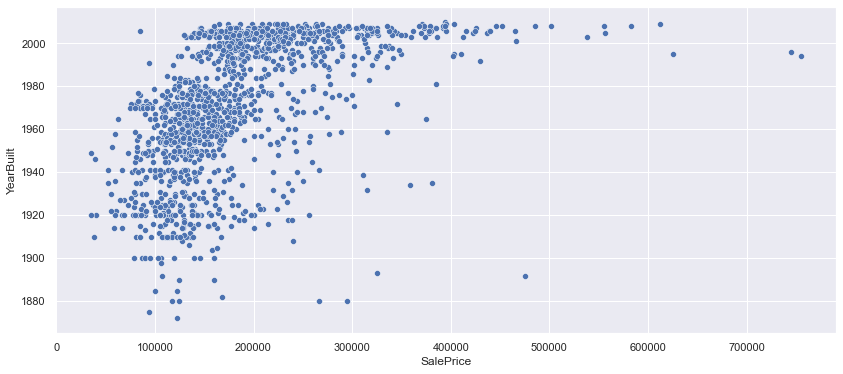

In [71]:
sns.scatterplot(x='SalePrice', y='YearBuilt', data=df)

Esse ScatterPlot nos mostra que existem alguns outliers no preço máximo das casas vendidas. 

Considerando apenas essas duas variáveis não é possível afirmar que existe uma correlação clara entre o valor da venda e o ano de construção já que tanto nos valores mais baixos quanto nos valores medianos existem vendas de casas novas e antigas.

Esse fato pode ser dado pelas reformas realizadas então vamos dar uma olhada no valor das vendas pelo ano de reforma.

Mas primeiro vamos verificar o percentual de casas que receberam reformas.

In [89]:
missing = pd.isnull(df['YearRemodAdd'])
df[missing]

# Aparentemente não há valores ausentes nessa feature. Logo 100% das casas foram reformadas em algum momento

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [91]:
df.groupby('YearRemodAdd')['SalePrice'].mean()

YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
            ...      
2006    229471.134021
2007    224807.250000
2008    269709.100000
2009    284085.391304
2010    336963.500000
Name: SalePrice, Length: 61, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='YearRemodAdd'>

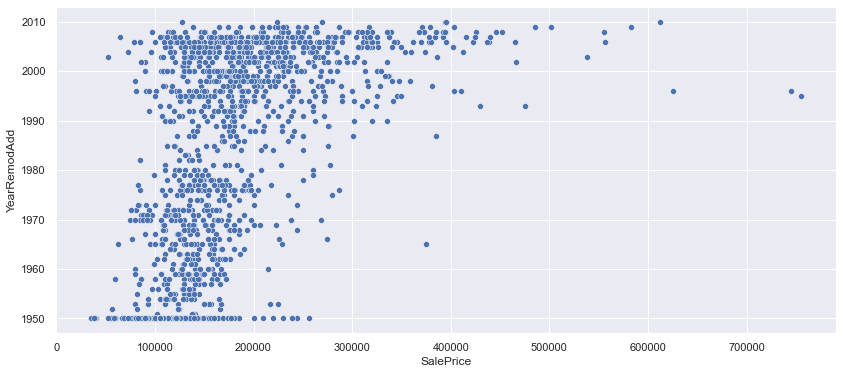

In [100]:
sns.scatterplot(x='SalePrice', y='YearRemodAdd', data=df)

Essa plotagem se mostrou bastante semelhante à anterior. Aparentemente também não há uma clara e decisiva relação entre o ano da reforma realizada com o preço final da casa. Até porque como vimos 100% das casas foram reformadas em algum momento, o que indica que 100% dos vendedores de casas nesse estudo se atentaram à esse ponto de precificação. 

Ainda falando de preço podemos analisar a feature 'YrSold' que nos diz o ano em que essa casa foi vendida. Com essa coluna podemos verificar se houve uma valorização evidente no preço das casas em média no período do estudo (2006-2010).

In [101]:
df.groupby('YrSold')['SalePrice'].mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

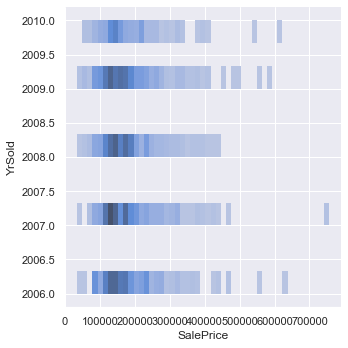

In [104]:
sns.displot(x='SalePrice', y='YrSold', data=df)

Por meio desse displot podemos verificar que os valores não sofreram grandes variações considerando esse período. Fato que se fosse comparado com nossa década seria bastante diferente por conta da COVID e outros fatores políticos mundiais. Se tivessemos dados do Brasil nessa última década eu suponho que teriamos grandes variações para mais entre 2012-2022.

É possível afirmar que não houve nenhuma catástrofe no mercado imobiliário e na economia do país durante esse período? Acredito que sim.

#### MATRIZ DE CORRELAÇÃO:

Agora vou parar de pesquisar aleatoriamente hipóteses por curiosidade e vou criar uma **matriz de correlação** com o intuito de encontrar as características que tem mais relação entre si na definição do preço das casas vendidas.

In [109]:
# Essa é a matriz de correlação bruta usando o método Pearson (correlação linear) que é o padrão
# No método Pearson quanto mais próximo de 1 entre duas colunas (excluindo a si mesma) maior é a correlação entre elas
# Vou guardar o resultado em um objeto para acessá-lo mais tarde

corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

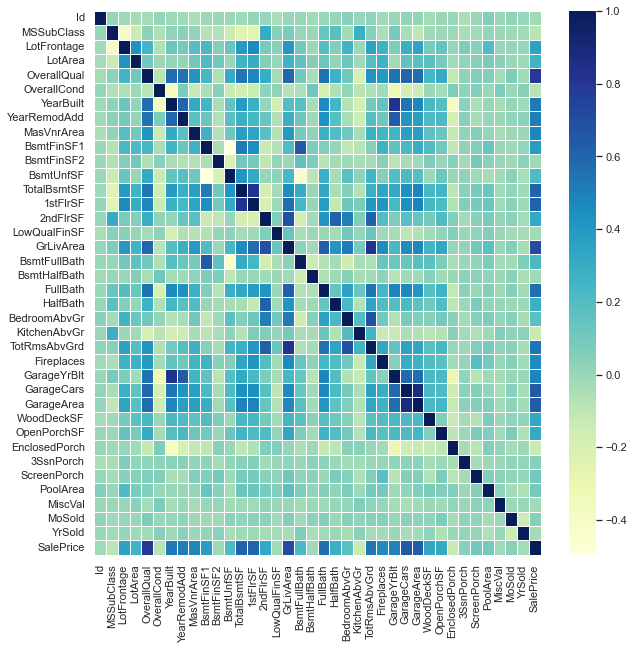

In [119]:
# O nosso foco está na coluna SalePrice (a última linha da matriz bruta)
# Para facilitar a visualização vamos criar um mapa de calor e verificar onde os valores estão mais próximos de 1 para SalePrice
# Na escala quanto mais Azul Escuro mais próximo de 1

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=False, linewidths=.5, cmap='YlGnBu')

##### Dados numéricos de correlação com SalePrice:
    
- OverallQual: 0.790982 - Qualidade geral do material e acabamento da casa
- TotalBsmtSF: 0.613581 - Tamanho total da área construida (do fundamento da casa)
- 1stFlrSF: 0.605852 - Metros quadrados do primeiro andar
- GrLivArea: 0.708624 - Tamanho total da área de estar
- GarageCars: 0.640409 - Número de carros que a garagem suporta
- GarageArea: 0.623431 - Tamanho da garagem

Essas foram as correlações mais altas entre todo o df. Mas e na prática, elas fazem sentido? Aparentemente sim porque tem valor quando pensamos nas nossas experiências. Talvez tivéssemos a hipótese de que outras variáveis fossem mais importantes como o número de quartos, por exemplo.

Só que o número de quartos performou apenas 0.168213. Interessante, não?


##### Agora vamos plotar os gráficos baseando-se nos números de maior correlação que nós já temos. Ao invés de seguirmos nossa intuição.

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

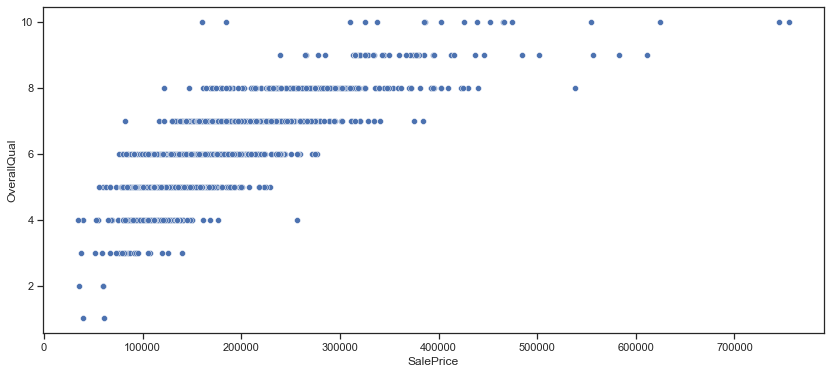

In [125]:
sns.scatterplot(x='SalePrice', y='OverallQual', data=df)

# Claramente uma relação de ascenção do preço com a qualidade dos materiais e acabamentos. 
# Existem outliers com preços baixos e ótimo indicador, porém, são excessões.

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

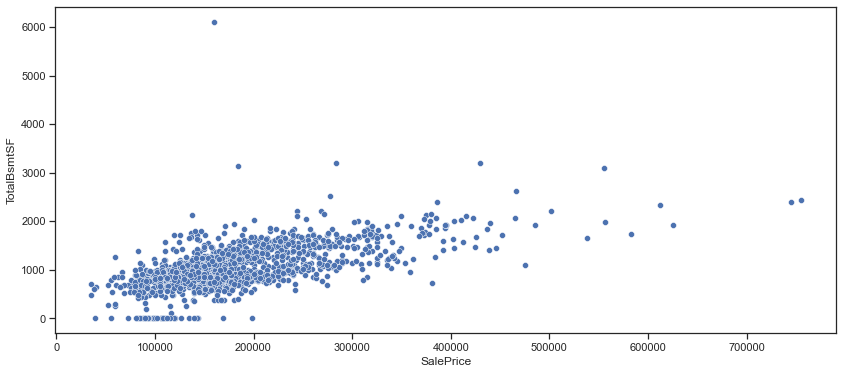

In [126]:
sns.scatterplot(x='SalePrice', y='TotalBsmtSF', data=df)

# Outra clara relação. Aparentemente o método de correlação estava certo.

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

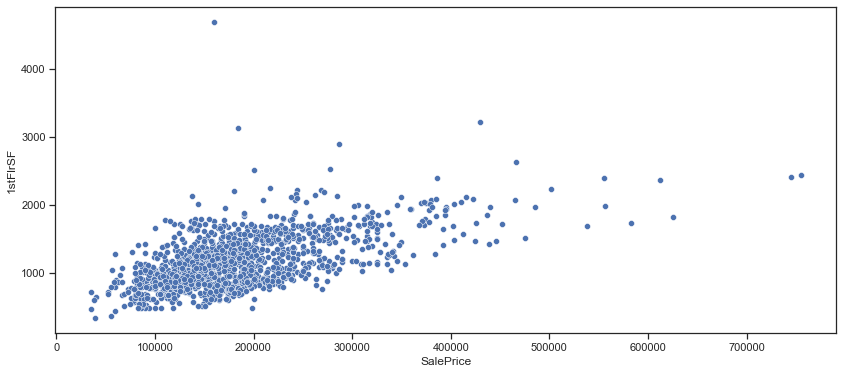

In [127]:
sns.scatterplot(x='SalePrice', y='1stFlrSF', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

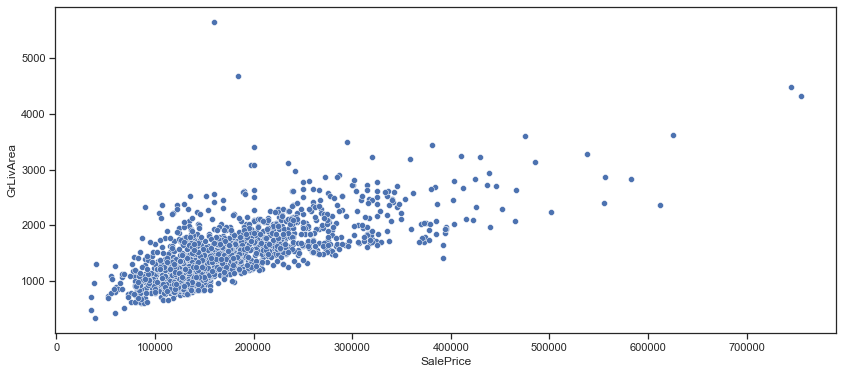

In [128]:
sns.scatterplot(x='SalePrice', y='GrLivArea', data=df)

# Repare como todas as plotagens estão fazendo muito mais sentido agora que estamos analisando as features certas.

<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>

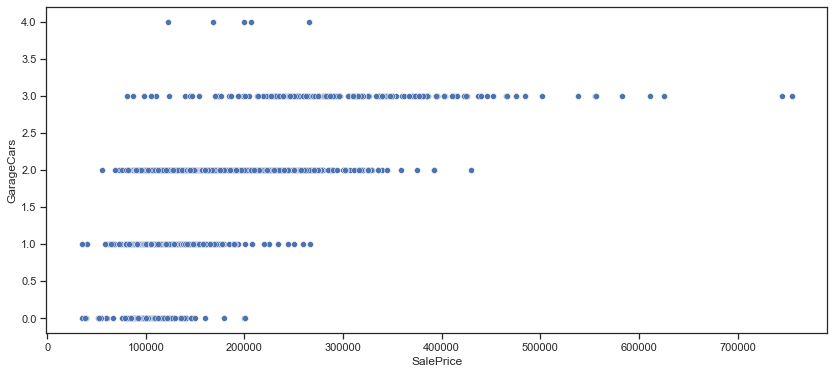

In [129]:
sns.scatterplot(x='SalePrice', y='GarageCars', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

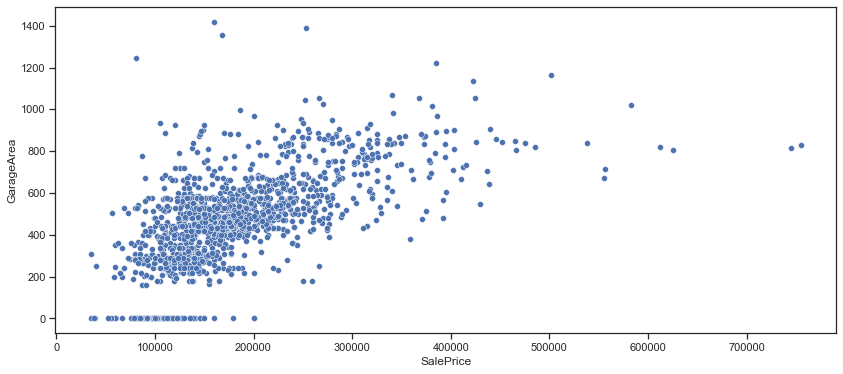

In [130]:
sns.scatterplot(x='SalePrice', y='GarageArea', data=df)